## Author - Malvika Arora

## GRIP @ The Sparks Foundation

## Data Science and Business Analytics Intern

## Batch - September 2023

# Task - 3 Exploratory Data Analysis Retail

### Objective:

- Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
- As a business manager, try to find out the weak areas where you can work to make more profit.
- What all business problems you can derive by exploring the data?

Link to download the dataset

https://drive.google.com/file/d/1lV7is1B566UQPYzzY8R2ZmOritTW299S/view

In [2]:
# Impotant libraries which we will use in this project:-

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# First we will load our dataset 

df = pd.read_csv("C:\\Users\\Malvika\\Downloads\\SampleSuperstore.csv", )
pd.set_option('display.max_columns', None) 

In [4]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


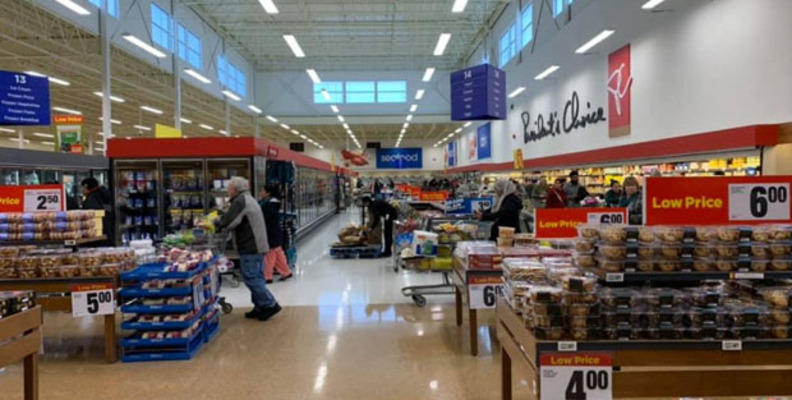

In [5]:
from IPython import display
display.Image("C:\\Users\\Malvika\\Downloads\\store.jpg")

# Data Analysis

In [6]:
# To check the shape of our dataset

df.shape  # it has 9994 rows and 13 columns

(9994, 13)

In [7]:
# To check the size of our dataset

df.size  # the total size

129922

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [9]:
# describe() provides statistical measures such as count, mean, standard deviation, minimum, quartiles, and maximum values for each numeric column in the DataFrame.

df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
df.columns  # this will display the columns name

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [11]:
df.isnull().sum()  # this will check the null values in the dataset and 0 mean no null value

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [12]:
# To check for duplicate values

duplicate_count = df.duplicated().sum()
print(duplicate_count) 

17


__Now as we can see above there are 17 duplicates so let's drop them__

In [13]:
df = df.drop_duplicates()

In [14]:
df.duplicated().sum()

0

Duplicates have been removed from the dataset

In [15]:
type(df) 

pandas.core.frame.DataFrame

In [16]:
# let's check the unique values count of all the features

df.nunique() 

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [17]:
# Let's drop the unwanted columns

df = df.drop("Postal Code", axis=1)

In [18]:
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [19]:
# Let's check the correlation between the numerical features

df1 = df[["Sales", "Quantity", "Discount", "Profit"]]
df1.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


# Data Visualization

<AxesSubplot:>

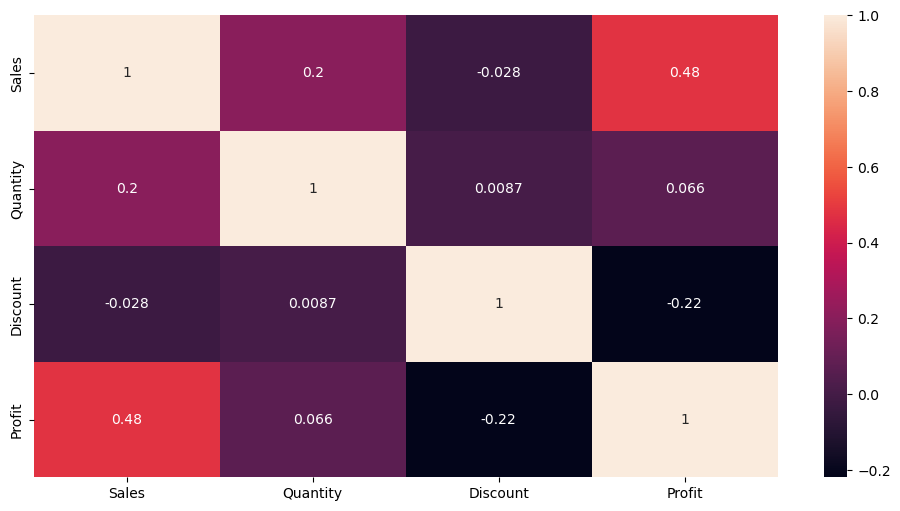

In [46]:
plt.figure(figsize=(12,6))
sns.heatmap(df1.corr(), annot=True)

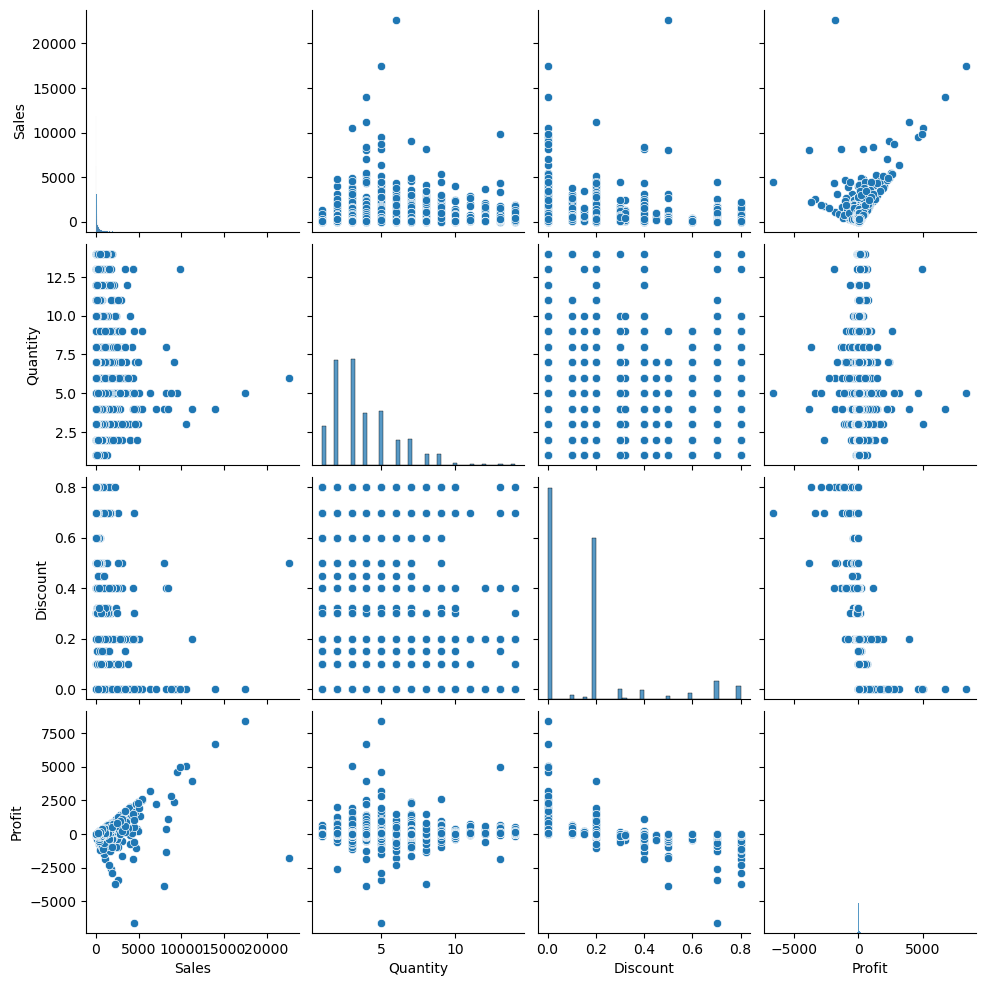

In [103]:
sns.pairplot(df)

## State wise Analysis

In [54]:
df_state = df["State"].value_counts()
df_state

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

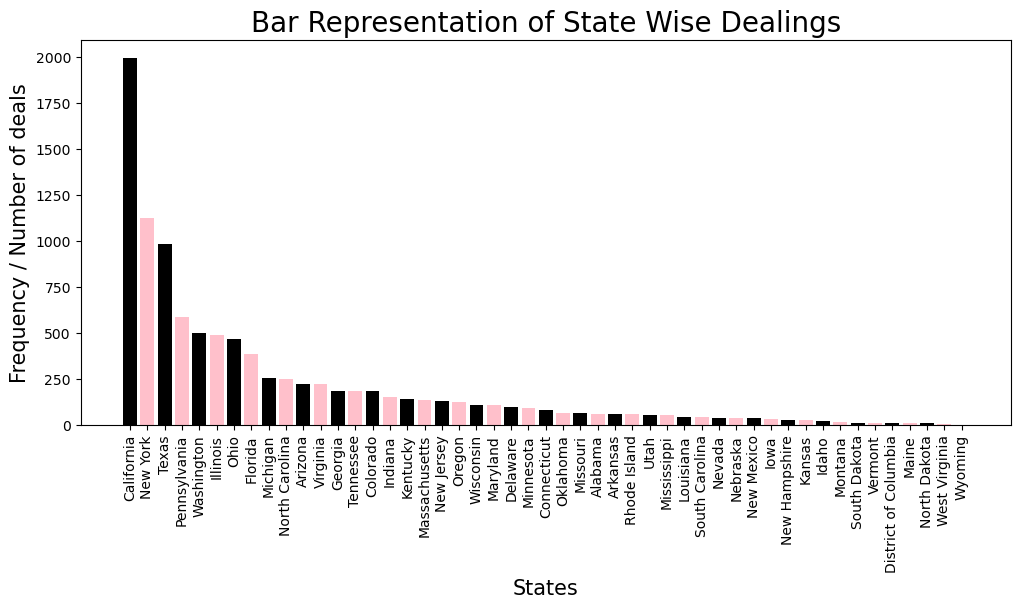

In [112]:
plt.figure(figsize=(12,5))
colors = ['black', 'pink']
plt.bar(df_state.index, df_state.values, color=colors)
plt.xlabel("States", fontsize=15)
plt.ylabel("Frequency / Number of deals", fontsize=15)
plt.title("Bar Representation of State Wise Dealings", fontsize=20)
plt.xticks(rotation=90)
plt.show()

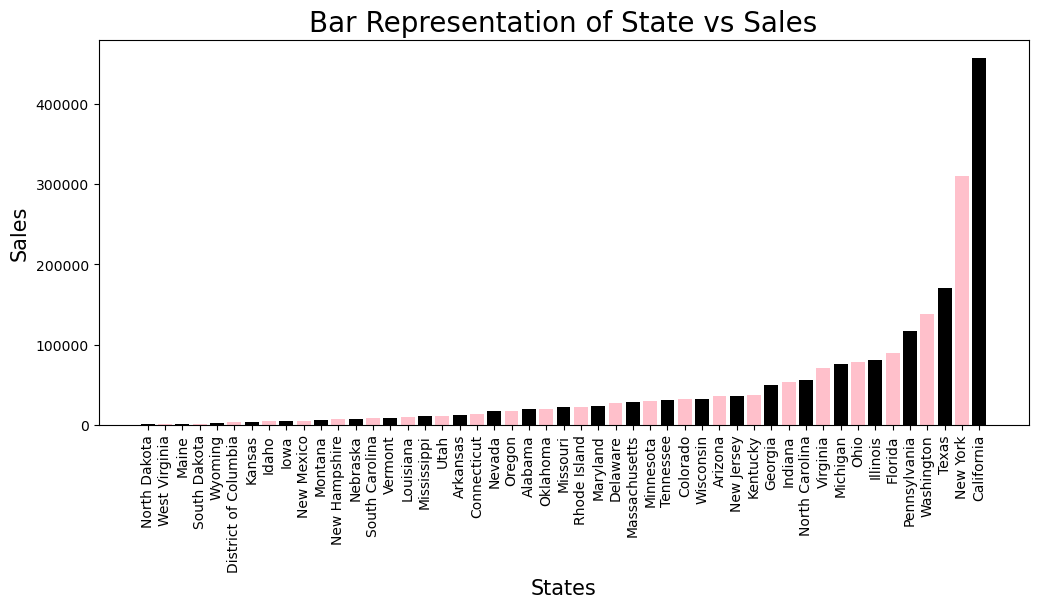

In [24]:
## City wise sales analysis

state_sales = df.groupby('State')['Sales'].sum().reset_index()
state_sales = state_sales.sort_values(by='Sales', ascending=True)  # Sort by Sales in ascending order


plt.figure(figsize=(12, 5))
colors = ['black', 'pink']
plt.bar(state_sales['State'], state_sales['Sales'], color=colors)
plt.xlabel("States", fontsize=15)
plt.ylabel("Sales", fontsize=15)
plt.title("Bar Representation of State vs Sales", fontsize=20)
plt.xticks(rotation=90)
plt.show()

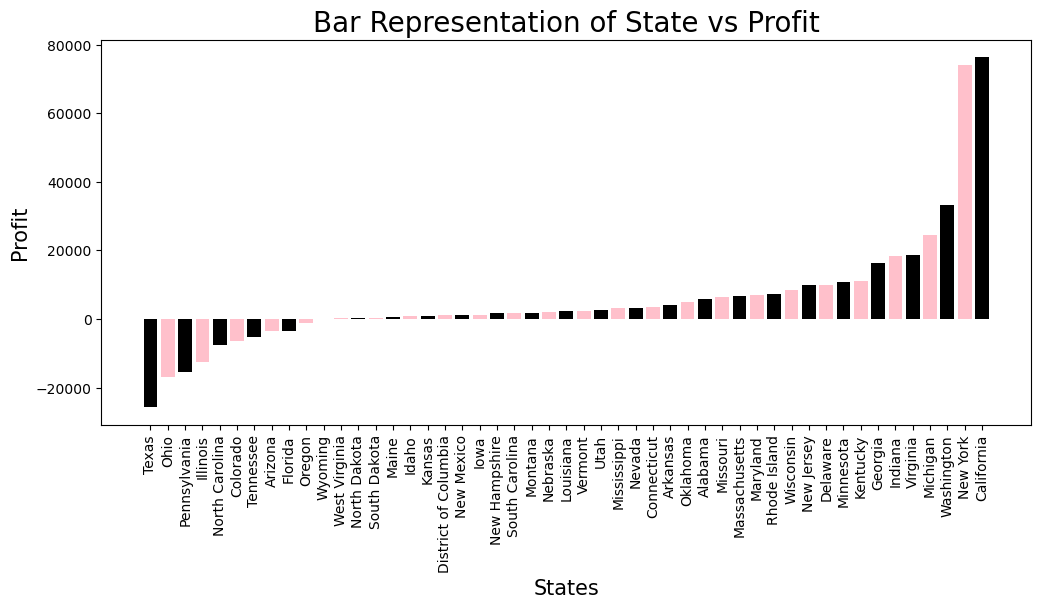

In [26]:
## City wise Profit analysis

state_sales = df.groupby('State')['Profit'].sum().reset_index()
state_sales = state_sales.sort_values(by='Profit', ascending=True)  # Sort by Sales in ascending order


plt.figure(figsize=(12, 5))
colors = ['black', 'pink']
plt.bar(state_sales['State'], state_sales['Profit'], color=colors)
plt.xlabel("States", fontsize=15)
plt.ylabel("Profit", fontsize=15)
plt.title("Bar Representation of State vs Profit", fontsize=20)
plt.xticks(rotation=90)
plt.show()

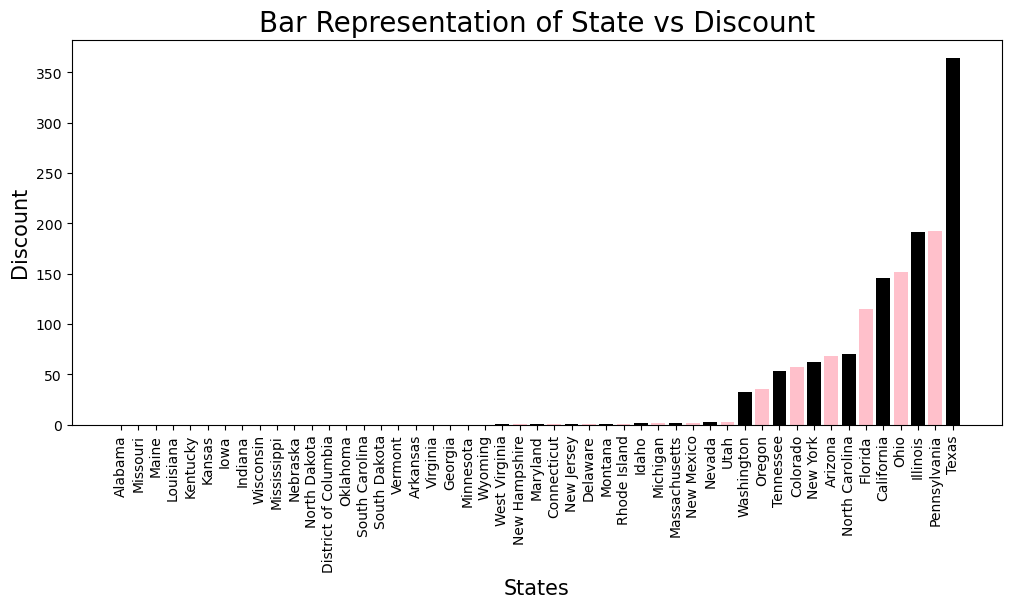

In [27]:
## City wise Discount analysis

state_sales = df.groupby('State')['Discount'].sum().reset_index()
state_sales = state_sales.sort_values(by='Discount', ascending=True)  # Sort by Sales in ascending order


plt.figure(figsize=(12, 5))
colors = ['black', 'pink']
plt.bar(state_sales['State'], state_sales['Discount'], color=colors)
plt.xlabel("States", fontsize=15)
plt.ylabel("Discount", fontsize=15)
plt.title("Bar Representation of State vs Discount", fontsize=20)
plt.xticks(rotation=90)
plt.show()

## Observations from State wise Analysis :-


- Highest Number of deal = Califonia
- Lowest Number of deal = Wyoming
- Highest amount of sales = Califonia & New York City
- Lowest amount of sales = North Dakota
- Highest Profit = Califonia
- Lowest Profit = West Virginia
- States with loss = Texas, Ohio, Pennsylvania, Illinois, North Carolina etc
- Highest discount offering = Texas

## Ship Mode Analysis

In [116]:
df_shipmode = df["Ship Mode"].value_counts()
df_shipmode

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

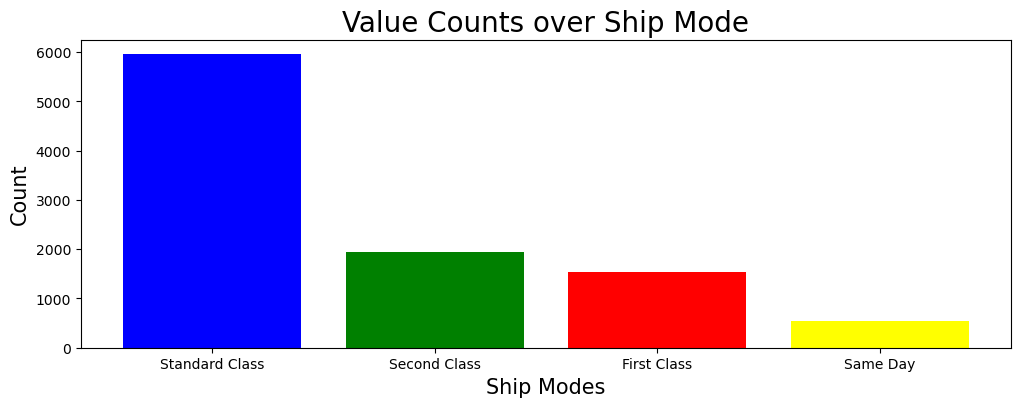

In [119]:
plt.figure(figsize=(12,4))
colors = ['blue', 'green', 'red', "yellow"]
plt.bar(df_shipmode.index, df_shipmode.values, color=colors)
plt.xlabel("Ship Modes", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Value Counts over Ship Mode", fontsize=20)
plt.show()

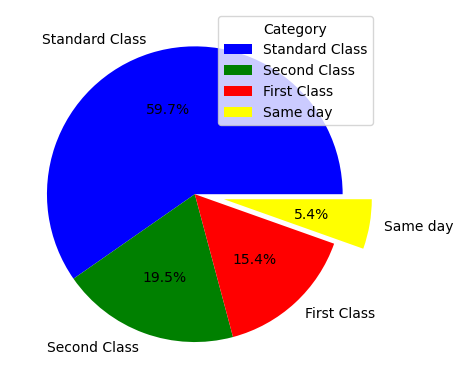

In [120]:
labels = ["Standard Class", "Second Class", "First Class", "Same day"]
mycolors = ['blue', 'green', 'red', "yellow"]
myexplode = [0, 0,0, 0.2]
plt.pie(df["Ship Mode"].value_counts(), labels=labels, autopct='%1.1f%%', colors=mycolors, explode = myexplode)
plt.legend(title="Category")

In [39]:
df_shipmode = df.groupby(['Ship Mode'])[['Sales', 'Profit']].mean()
df_shipmode

,Sales,Profit
Ship Mode,,
First Class,228.614490,31.850134
Same Day,236.755950,29.283924
Second Class,236.323750,29.565956
Standard Class,227.928858,27.534715


__As we can see majority of the mode which is used by the ship is standard mode__

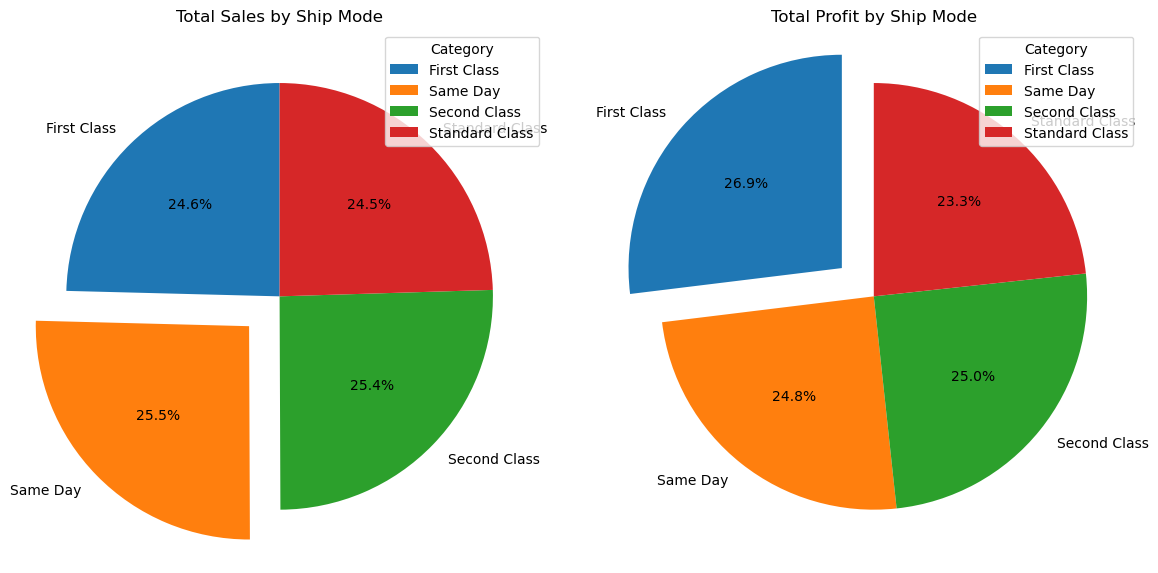

In [43]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
myexplode = [0, 0.2 ,0, 0]
plt.pie(df_shipmode['Sales'], labels=df_shipmode.index, autopct='%1.1f%%', startangle=90, explode= myexplode)
plt.title('Total Sales by Ship Mode')
plt.legend(title="Category")

# Plot Total Profit by Ship Mode
plt.subplot(1, 2, 2)
myexplode = [0.2, 0,0, 0]
plt.pie(df_shipmode['Profit'], labels=df_shipmode.index, autopct='%1.1f%%', startangle=90, explode= myexplode)
plt.title('Total Profit by Ship Mode')

plt.tight_layout()
plt.legend(title="Category")
plt.show()

## Observations from Ship Mode Analysis :

- Highly preferred mode = Standard Class (59.7 %)
- Least preferred mode = Same Day (5.4 %)
- Highest Sale = Same Day (25.5 %)
- Highest Profit = First Class (26.9 %)

## Segment Wise Analysis

In [77]:
df_segment = df["Segment"].value_counts()
df_segment

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

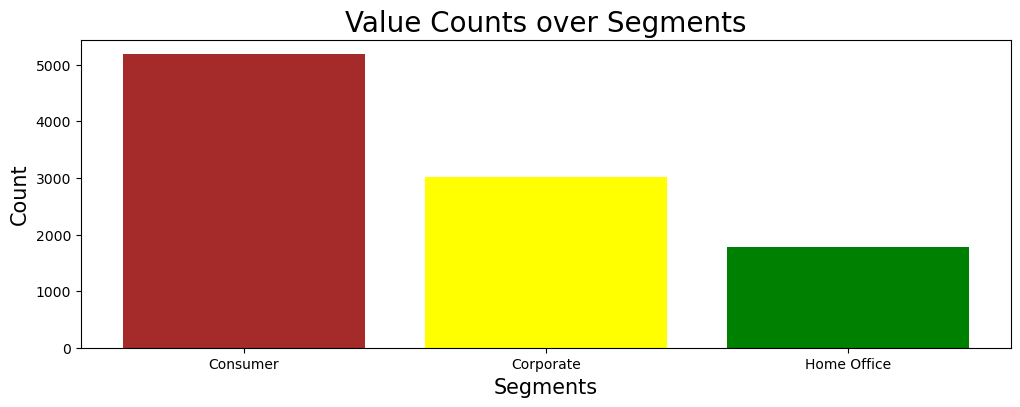

In [117]:
plt.figure(figsize=(12,4))
colors = ['brown', 'yellow', 'green']
plt.bar(df_segment.index, df_segment.values, color=colors)
plt.xlabel("Segments", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Value Counts over Segments", fontsize=20)
plt.show()

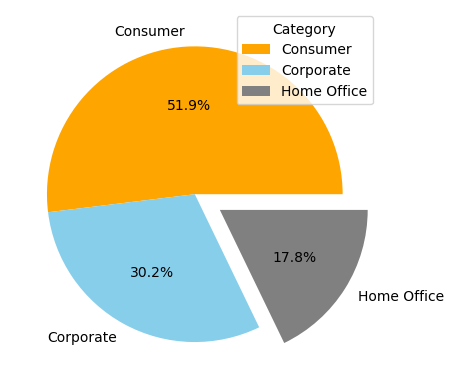

In [115]:
labels = ["Consumer", "Corporate", "Home Office"]
mycolors = ["orange", "skyblue", "grey"]
myexplode = [0, 0, 0.2]
plt.pie(df["Segment"].value_counts(), labels=labels, autopct='%1.1f%%', colors=mycolors, explode = myexplode)
plt.legend(title="Category")

__From the above representation we can see consumers are our higher contributor__

In [45]:
df_segment = df.groupby(['Segment'])[['Sales', 'Profit']].mean()
df_segment

,Sales,Profit
Segment,,
Consumer,223.969279,25.855188
Corporate,234.185781,30.499164
Home Office,241.311234,33.883643


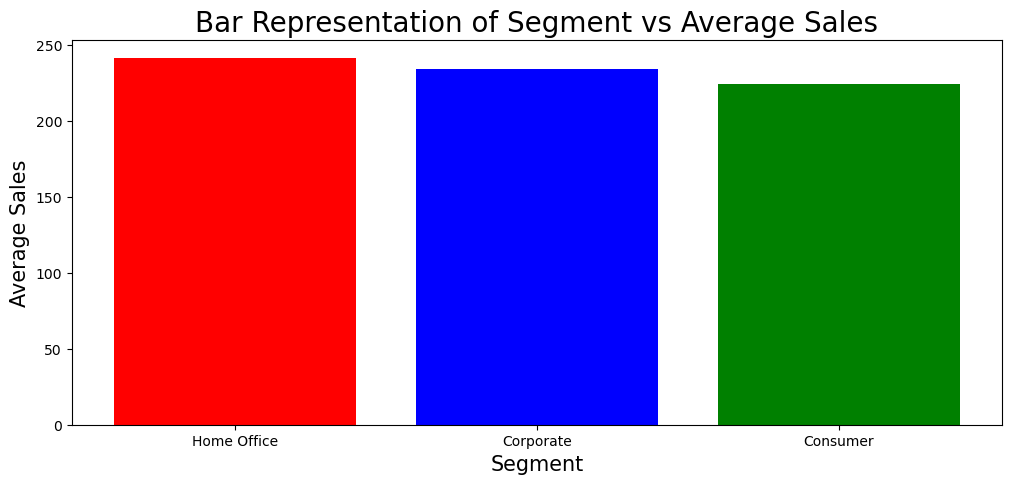

In [50]:
df_segment = df_segment.sort_values(by='Sales', ascending=False)  # Sort by Sales in descending order

plt.figure(figsize=(12, 5))
colors = ["red", "blue", "green"]
plt.bar(df_segment.index, df_segment['Sales'], color=colors)
plt.xlabel("Segment", fontsize=15)
plt.ylabel("Average Sales", fontsize=15)
plt.title("Bar Representation of Segment vs Average Sales", fontsize=20)
plt.xticks(rotation=0)  # You can adjust the rotation if needed
plt.show()

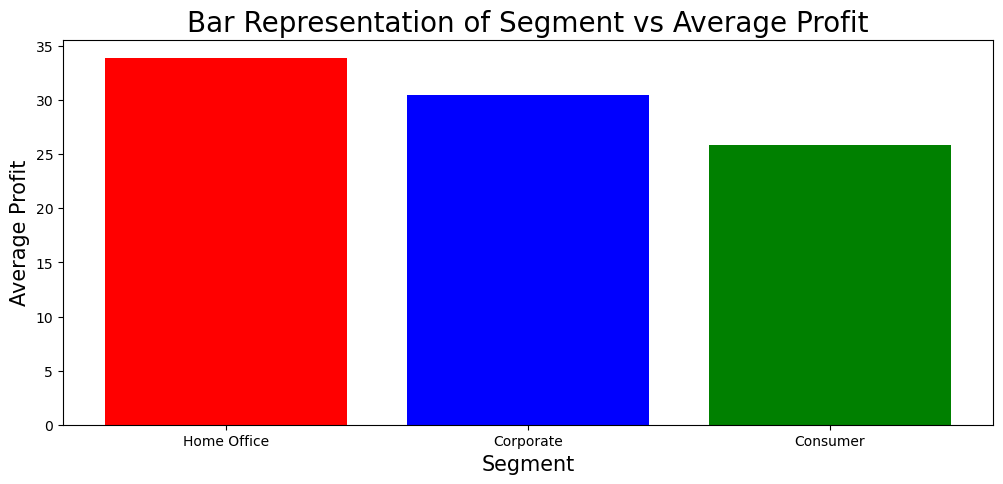

In [51]:
df_segment = df_segment.sort_values(by='Profit', ascending=False)  # Sort by Sales in descending order

plt.figure(figsize=(12, 5))
colors = ["red", "blue", "green"]
plt.bar(df_segment.index, df_segment['Profit'], color=colors)
plt.xlabel("Segment", fontsize=15)
plt.ylabel("Average Profit", fontsize=15)
plt.title("Bar Representation of Segment vs Average Profit", fontsize=20)
plt.xticks(rotation=0)  # You can adjust the rotation if needed
plt.show()

## Observations from Segment Wise Analysis :

- Highest segment contributor = Consumers (51.9 %)
- Highest sales and profit segment = Home Office

## Category Wise Analysis

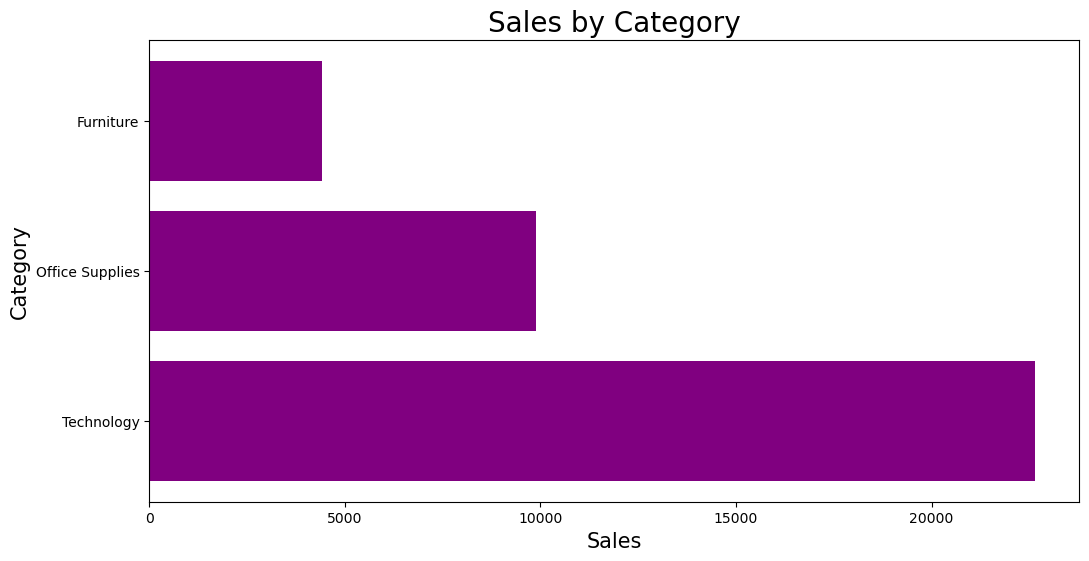

In [110]:
plt.figure(figsize=(12, 6))
plt.barh(df['Category'], df['Sales'], color="purple")
plt.xlabel("Sales", fontsize=15)
plt.ylabel("Category", fontsize=15)
plt.title("Sales by Category", fontsize=20)
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest sales at the top
plt.show()

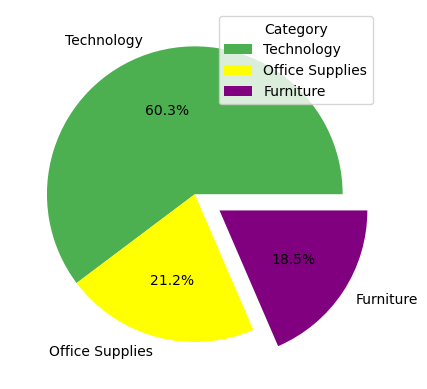

In [109]:
labels = ["Technology", "Office Supplies", "Furniture"]
mycolors = ["#4CAF50", "yellow", "purple"]
myexplode = [0, 0, 0.2]
plt.pie(df["Category"].value_counts(), labels=labels, autopct='%1.1f%%', colors=mycolors, explode = myexplode)
plt.legend(title="Category")

__Now we can see that Technology and Office supplies are most demanding__

<Figure size 1200x400 with 0 Axes>

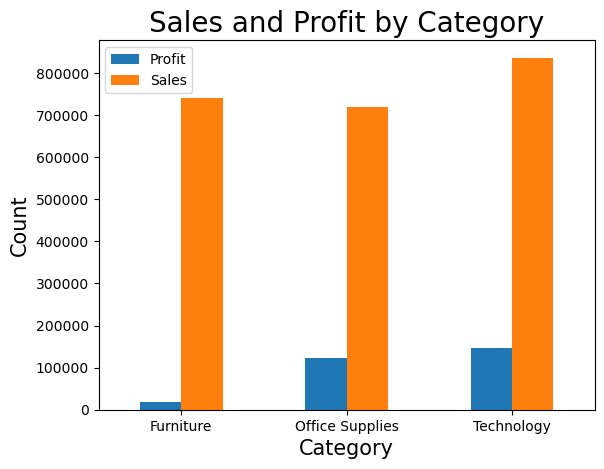

In [129]:
plt.figure(figsize=(12,4))
df.groupby("Category")[["Profit", "Sales"]].sum().plot.bar()
plt.xlabel("Category", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Sales and Profit by Category", fontsize=20)
plt.xticks(rotation=0)
plt.show()

__Now we can see that Technoloy and Office supplies have high sales and more profit whereas furniture has also high sales but the amount of profit is very less__

## Observations from Category Wise Analysis :

- Highest Orders = Technology (60.3 %)
- Highest sales and profit categories are = Technology and Office Supplies

## Region Wise Analysis

In [54]:
df_region = df["Region"].value_counts()
df_region

West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64

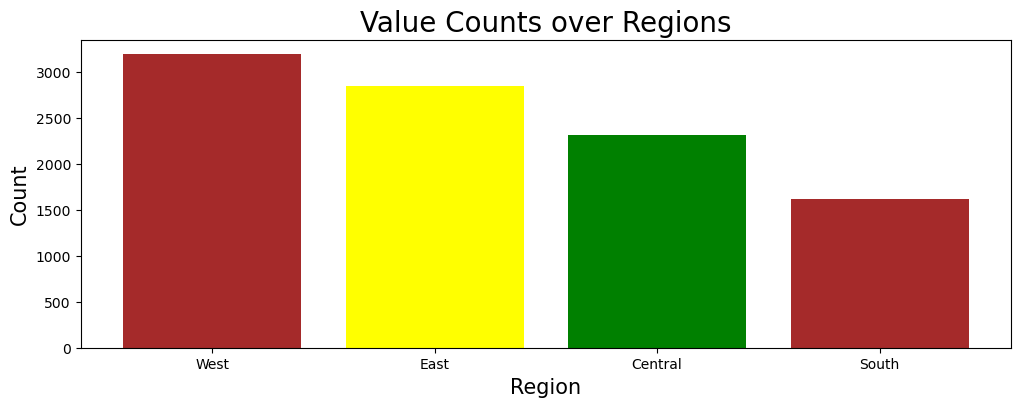

In [56]:
plt.figure(figsize=(12,4))
colors = ['brown', 'yellow', 'green']
plt.bar(df_region.index, df_region.values, color=colors)
plt.xlabel("Region", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Value Counts over Regions", fontsize=20)
plt.show()

__As we can see majority of the counts is from West region__

In [58]:
df_region = df.groupby(["Region"])[["Sales", "Profit"]].mean()
df_region

,Sales,Profit
Region,,
Central,215.947759,17.100421
East,238.465798,32.163905
South,241.803645,28.857673
West,227.139254,33.927281


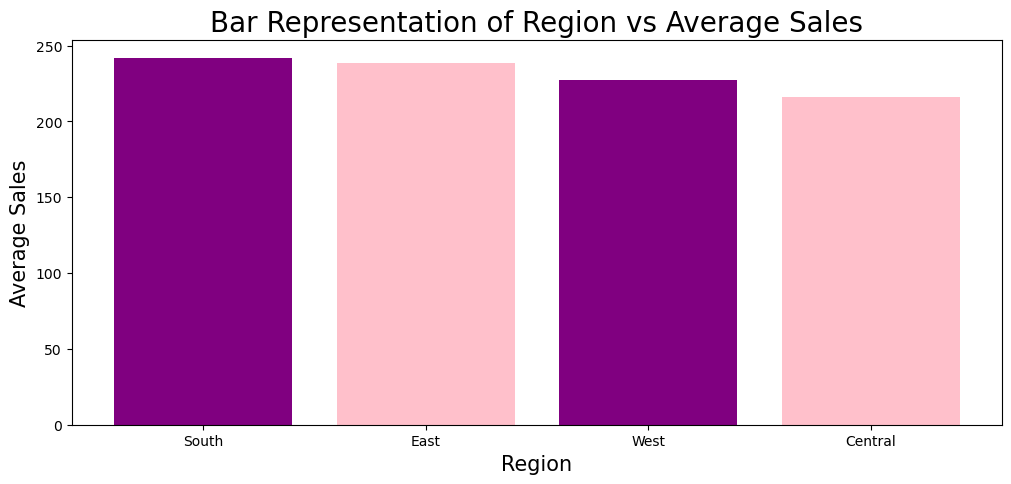

In [60]:
df_region = df_region.sort_values(by='Sales', ascending=False)  # Sort by Sales in descending order

plt.figure(figsize=(12, 5))
colors = ["purple", "pink", "purple", "pink"]
plt.bar(df_region.index, df_region['Sales'], color=colors)
plt.xlabel("Region", fontsize=15)
plt.ylabel("Average Sales", fontsize=15)
plt.title("Bar Representation of Region vs Average Sales", fontsize=20)
plt.xticks(rotation=0)  # You can adjust the rotation if needed
plt.show()

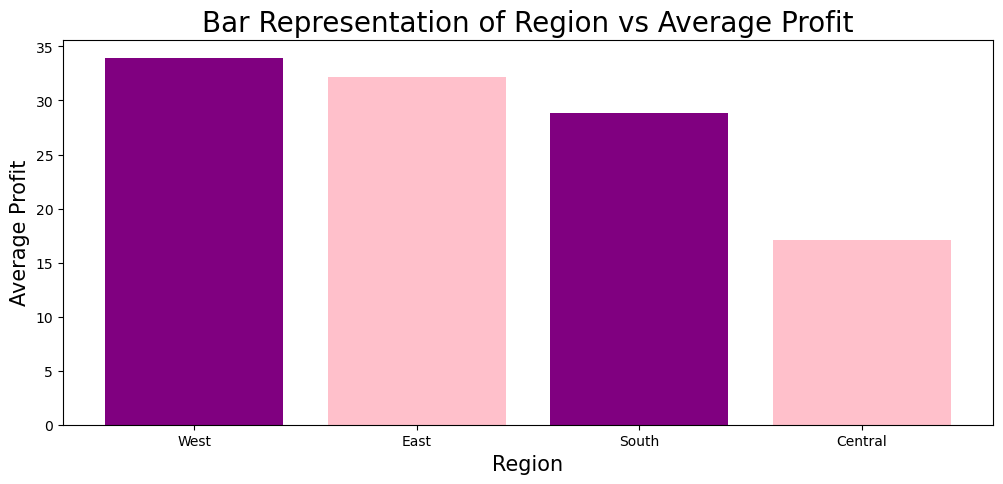

In [61]:
df_region = df_region.sort_values(by='Profit', ascending=False)  # Sort by Sales in descending order

plt.figure(figsize=(12, 5))
colors = ["purple", "pink", "purple", "pink"]
plt.bar(df_region.index, df_region['Profit'], color=colors)
plt.xlabel("Region", fontsize=15)
plt.ylabel("Average Profit", fontsize=15)
plt.title("Bar Representation of Region vs Average Profit", fontsize=20)
plt.xticks(rotation=0)  # You can adjust the rotation if needed
plt.show()

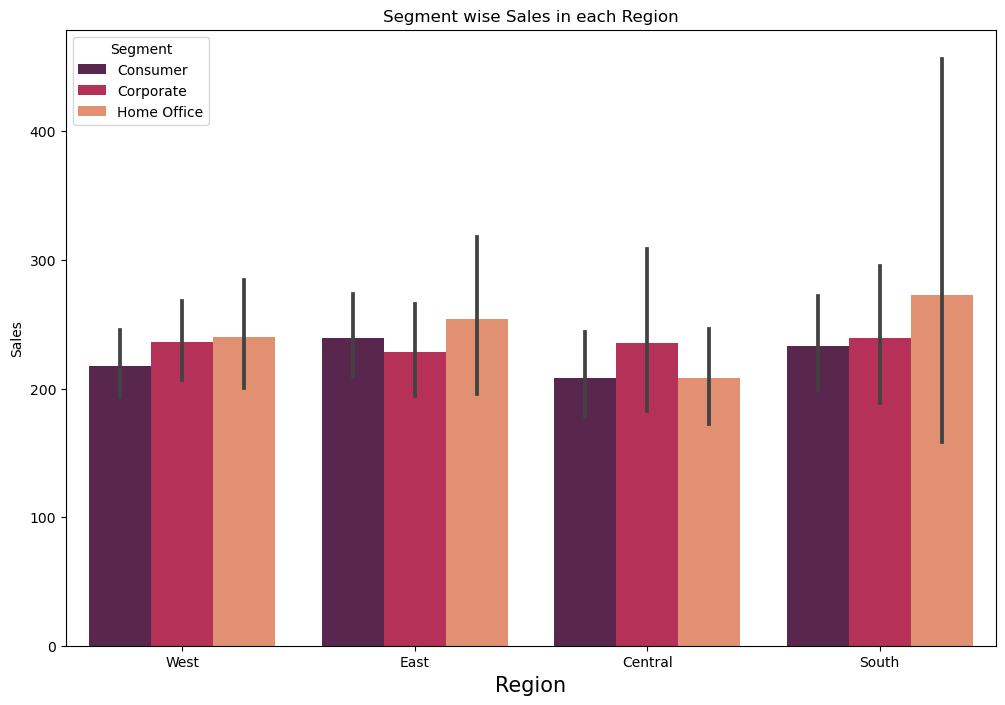

In [62]:
# Segment wise sales in each regions

plt.figure(figsize=(12,8))
plt.title('Segment wise Sales in each Region')
sns.barplot(x='Region',y='Sales',data=df,hue='Segment',order=df['Region'].value_counts().index,palette='rocket')
plt.xlabel('Region',fontsize=15)
plt.show()
     

## Observations from Region Wise Analysis :

- Highest number of counts is from = West Region
- Highest number of sales = South and East
- Highest number of profit = West and East
- Segment wise sales are almost same in every region

## Sub-Category wise Analysis

In [68]:
df_subcategory = df["Sub-Category"].value_counts()
df_subcategory

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

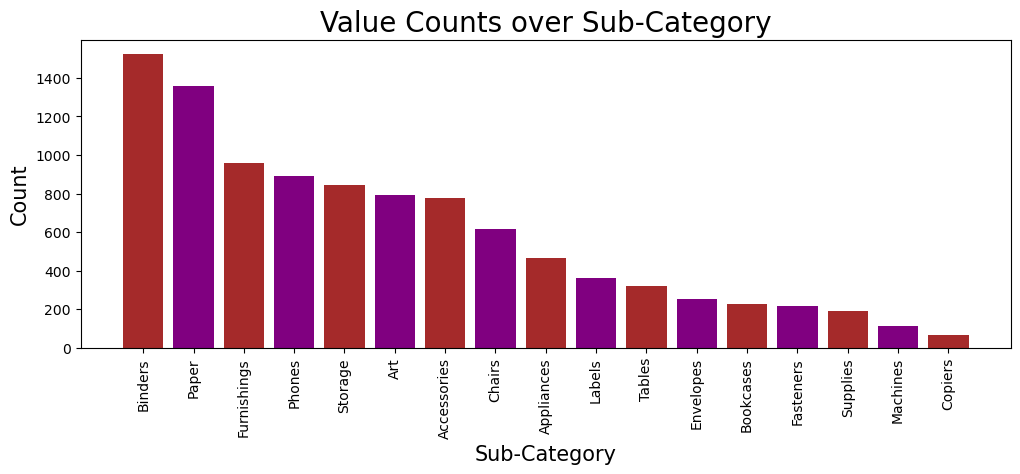

In [72]:
plt.figure(figsize=(12,4))

colors= ["brown", "purple"]
plt.bar(df_subcategory.index, df_subcategory.values, color=colors)
plt.xlabel("Sub-Category", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Value Counts over Sub-Category", fontsize=20)
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Sub-category wise distribution of orders')

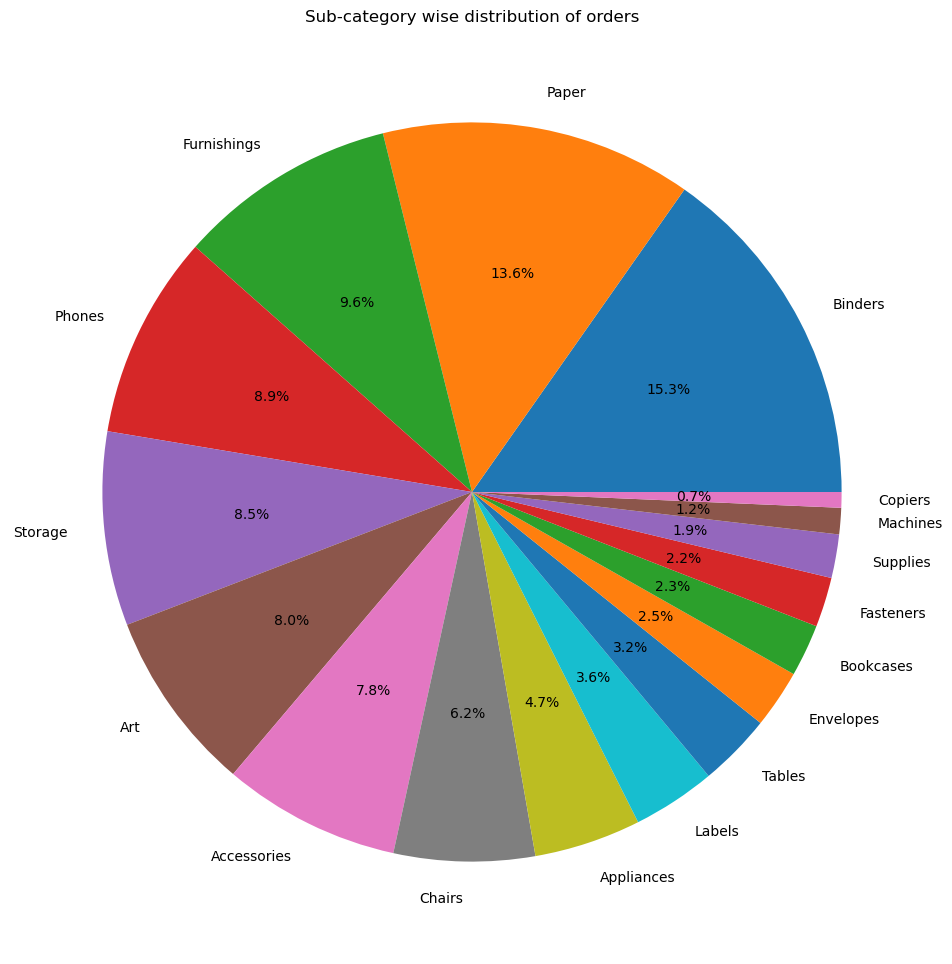

In [89]:
plt.figure(figsize=(14, 12))
plt.pie(df["Sub-Category"].value_counts(), autopct='%1.1f%%', labels=df_subcategory.index)
plt.title('Sub-category wise distribution of orders')

In [86]:
df_sub_sum=df.groupby("Sub-Category").sum()
df_sub_sum

C:\Users\Malvika\AppData\Local\Temp\ipykernel_18144\1523817707.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sub_sum=df.groupby("Sub-Category").sum()


,Sales,Quantity,Discount,Profit
Sub-Category,,,,
Accessories,167380.3180,2976,60.80,41936.6357
Appliances,107532.1610,1729,77.60,18138.0054
Art,27107.0320,2996,59.60,6524.6118
Binders,203409.1690,5971,566.20,30228.0003
Bookcases,114879.9963,868,48.14,-3472.5560
Chairs,327777.7610,2351,104.70,26567.1278
Copiers,149528.0300,234,11.00,55617.8249
Envelopes,16476.4020,906,20.40,6964.1767
Fasteners,3024.2800,914,17.80,949.5182


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Accessories'),
  Text(1, 0, 'Appliances'),
  Text(2, 0, 'Art'),
  Text(3, 0, 'Binders'),
  Text(4, 0, 'Bookcases'),
  Text(5, 0, 'Chairs'),
  Text(6, 0, 'Copiers'),
  Text(7, 0, 'Envelopes'),
  Text(8, 0, 'Fasteners'),
  Text(9, 0, 'Furnishings'),
  Text(10, 0, 'Labels'),
  Text(11, 0, 'Machines'),
  Text(12, 0, 'Paper'),
  Text(13, 0, 'Phones'),
  Text(14, 0, 'Storage'),
  Text(15, 0, 'Supplies'),
  Text(16, 0, 'Tables')])

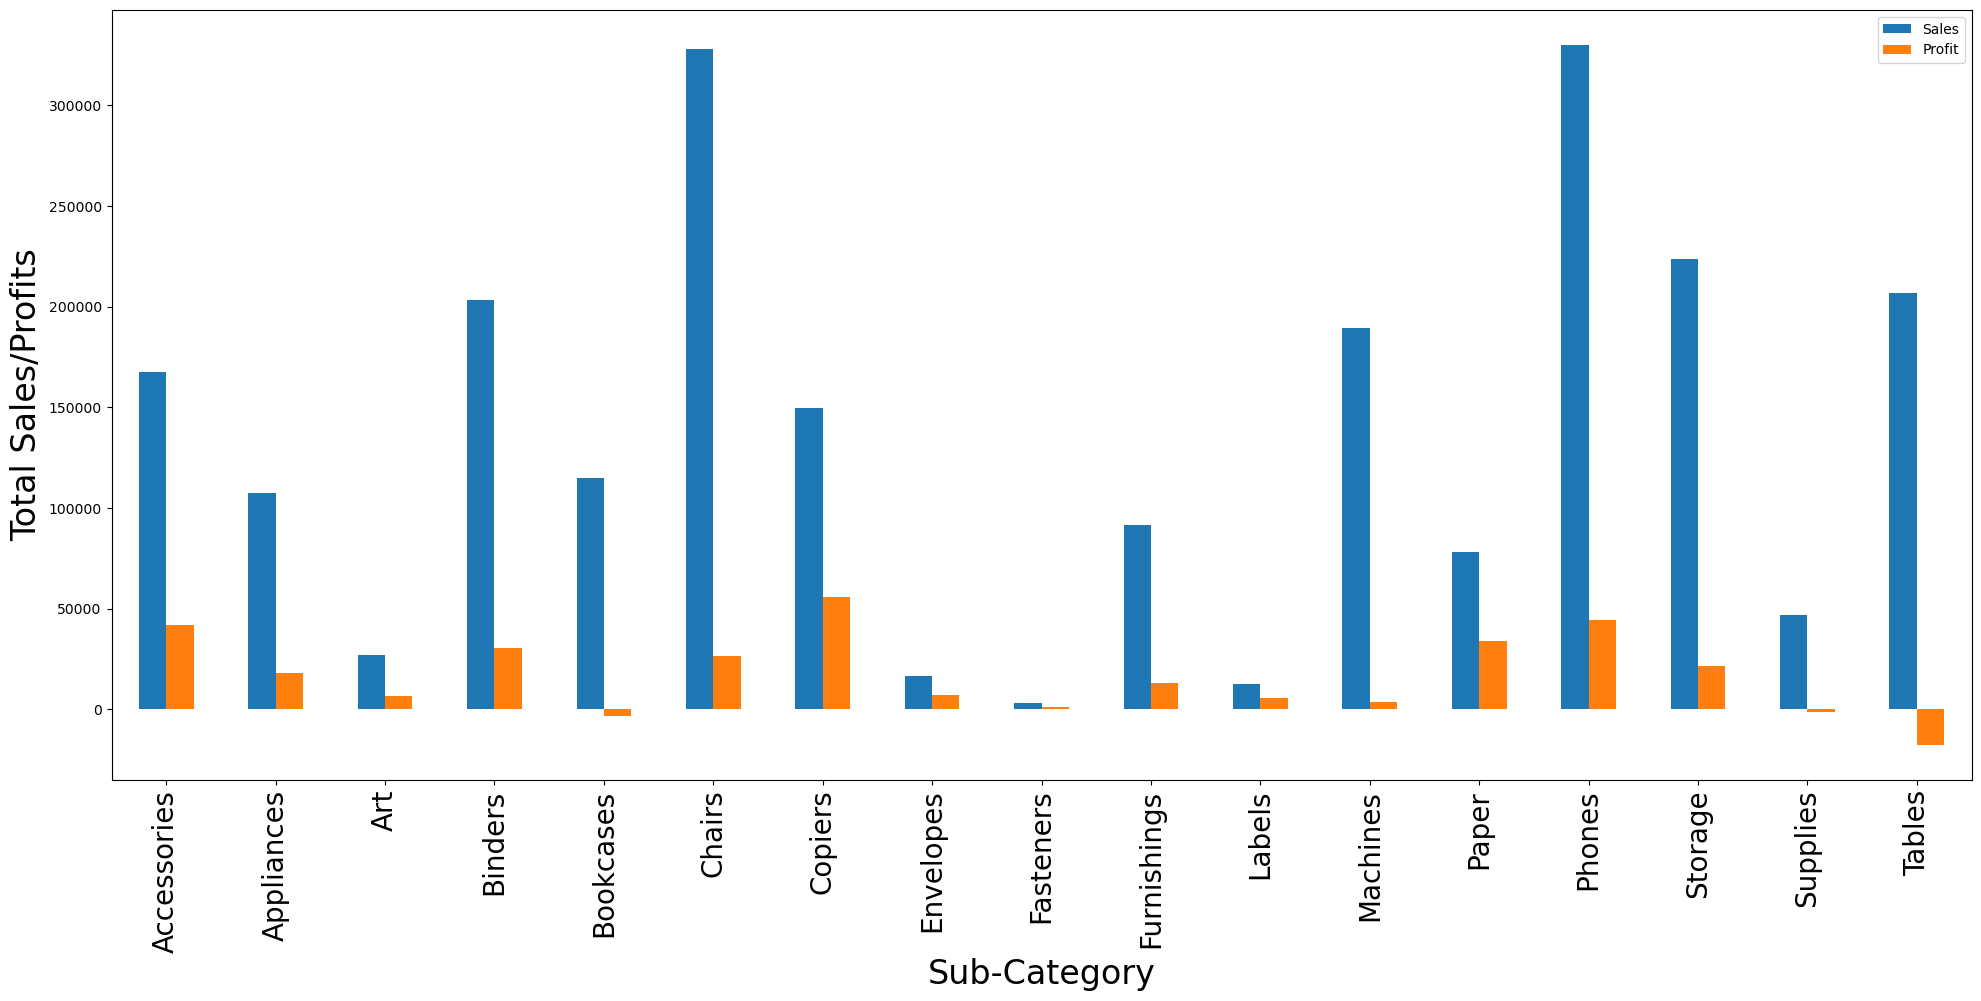

In [100]:
df_sub_sum[['Sales', 'Profit']].plot(kind = 'bar', figsize = [24,10])
plt.ylabel('Total Sales/Profits',fontsize = 24)
plt.xlabel("Sub-Category",fontsize = 24)
plt.xticks(fontsize=20)

## Observations from Sub-Category wise Analysis :

- Highest Orders = Binders
- Lowest Orders = Copiers
- Highest Sales = Phones
- Lowest Sales = Fasteners
- Highest Profit = Copiers
- Lowest profit = Tables(Loss)

## Discount Analysis

Text(0.5, 1.0, 'Discount V/S Profit')

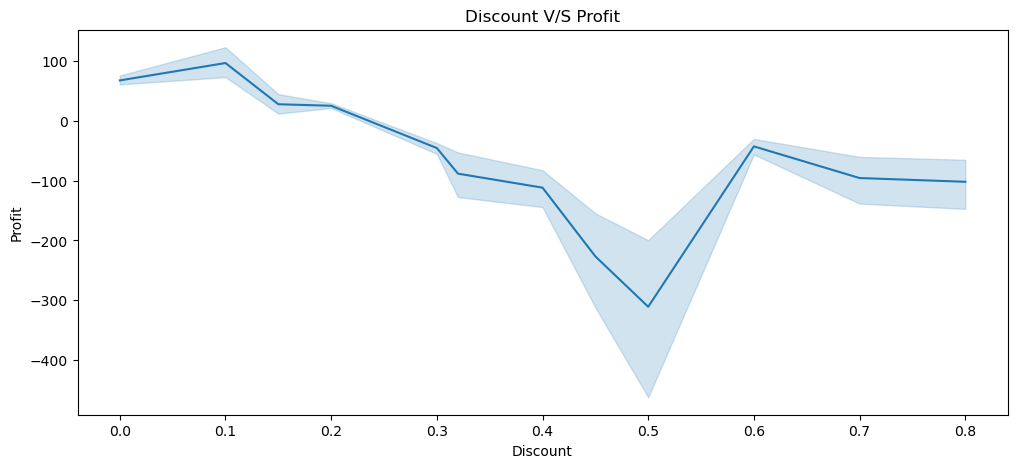

In [104]:
#Discount v/s Profit

plt.figure(figsize=(12,5))
sns.lineplot(x='Discount',y='Profit',data=df)
plt.title("Discount V/S Profit")

Text(0.5, 1.0, 'Discount V/S Sales')

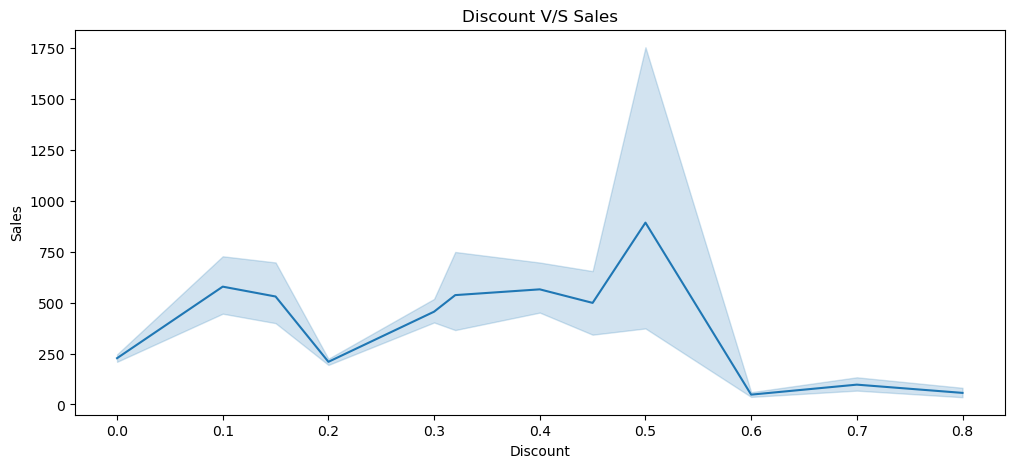

In [105]:
#Discount v/s Sales

plt.figure(figsize=(12,5))
sns.lineplot(x='Discount',y='Sales',data=df)
plt.title("Discount V/S Sales")

## Observations from Discount Analysis :

- High Discount results in Low Profit
- High Discount results in High Sales

# CONCLUSION

As a business manager, try to find out the weak areas where you can work to make more profit?*

- Will increase the number of deals in California and New York city tp get more sales and will blue-print the reasons to find the why the number of sales are less in North Dakota


- Will increase the ship mode of Same day and First class mode as they are giving high number of sales and profit


- Will increase the manufacture of Technology and Office Supplies products as they are giving high number of sales and profit and find the reasons why furniture is giving less amount of profit although it also have high number of sales so that all the 3 categories give more profit and sales.


- Will increase the production of sub-category like phones and copiers as they are high in demand and giving more amount of profit.


- And at last as high discount is giving less profit but high sales so will change the blue-print of all the prizes of products so that high sales results in high profits and consumer will also get attracted with the blue-print of prizes.